## Exercises


Q1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
* Use 'boat.jpg' as input.
* Apply Otsu thresholding.
* Draw bounding box to identify the region where the boat and people are located.

In [3]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

In [28]:
# Load image
img = cv.imread('images/boat.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply otsu thresholding
_, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Find contours
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create a copy of img 
imgs = img.copy()

# Draw bounding box
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(imgs, (x, y), (x + w, y + h), (0, 255, 0), 2)


cv.imshow('Segmented image', imgs)
cv.waitKey(0)
cv.destroyAllWindows()

Q2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

* Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
* Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar

In [43]:
# load image
img = cv.imread('images/leaf.jfif')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply otsu thresholding 
_, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

def nothing(x):
    pass

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, nothing)

while (1):
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
        
    # define the kernel
    kernel = np.ones((size, size), dtype=np.uint8)
    
    eroded = cv.erode(thresh, kernel)
    dilated = cv.dilate(thresh, kernel)
    opened = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)
    closed = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
    
     # Concatenate the results and show them in the window
    result = np.hstack((eroded, dilated, opened, closed))
    
    # Show results
    cv.imshow(wn, result)
    
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break
        
cv.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'window' in function 'cvGetTrackbarPos'


Q3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [52]:
blue_low = (85, 90, 0)
blue_high = (125, 255, 255)


def color_seg(img, color_low, color_high, smooth=True):
    """Arguments
    img: source image(RGB)
    low_color: hsc low
    high_color: hsv high
    smooth: boolean (Gaussian blurring)"""
    
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
    
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = cv.inRange(img_hsv, color_low, color_high)
    #morpholological operations
    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations=2)
    return cv.bitwise_and(img, img, mask=mask)


imgs = []
for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)

res = [color_seg(img, blue_low, blue_high) for img in imgs]

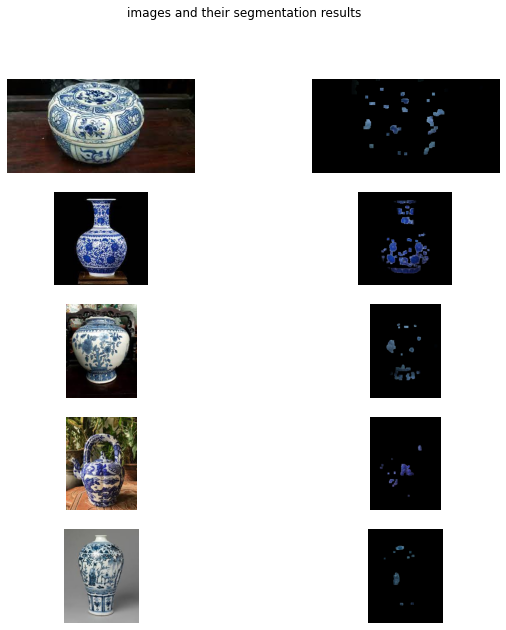

In [53]:
fig, ax = plt.subplots(5, 2, figsize=(10, 10))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("images and their segmentation results")
plt.show()